**Data Science Salaries prediction  with machine learning**

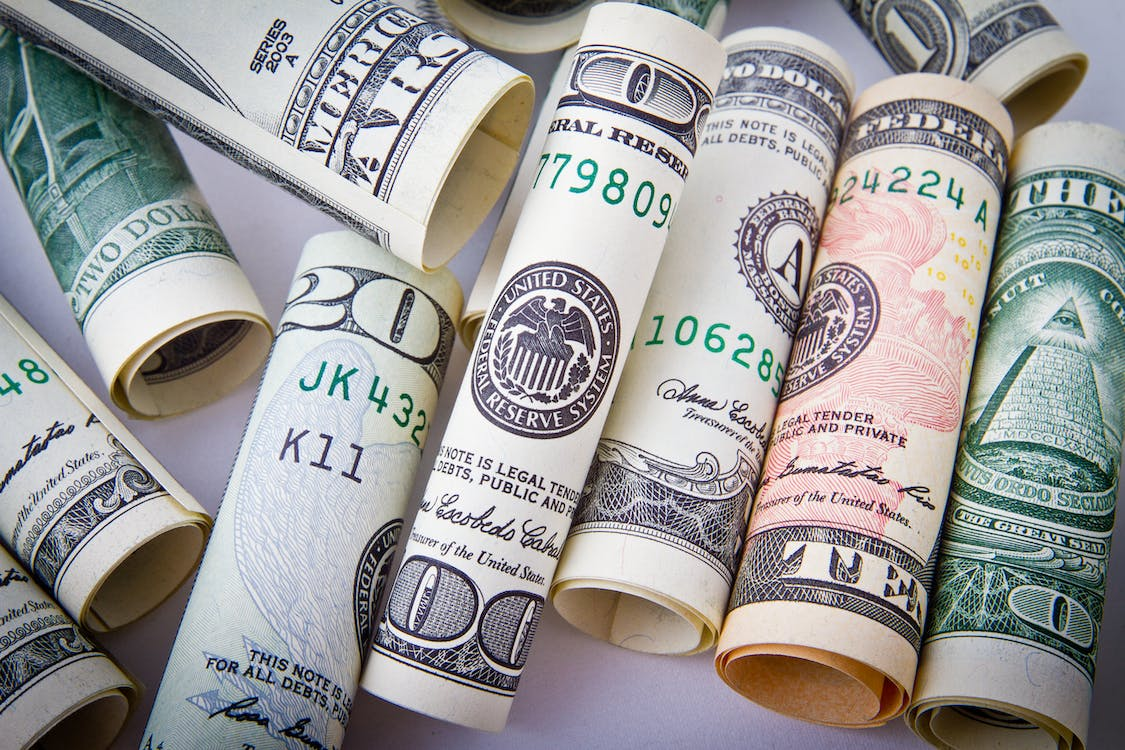

In [1]:
from PIL import Image
from IPython.display import display
import matplotlib.pyplot as plt

# Read the image using PIL
image_path = '/money.jpeg'  # Replace with the path to your image file
image = Image.open(image_path)

# Display the image in Google Colab
display(image)

In [2]:

plt.show()

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv("/ds_salaries.csv")

In [5]:
df. head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M



    work_year: The year the salary was paid.
    experience_level: The experience level in the job during the year
    employment_type: The type of employment for the role
    job_title: The role worked in during the year.
    salary: The total gross salary amount paid.
    salary_currency: The currency of the salary paid as an ISO 4217 currency code.
    salaryinusd: The salary in USD
    employee_residence: Employee's primary country of residence in during the work year as an ISO 3166 country code.
    remote_ratio: The overall amount of work done remotely
    company_location: The country of the employer's main office or contracting branch
    company_size: The median number of people that worked for the company during the year

In [6]:
df. shape

(3755, 11)

In [7]:
df. describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [8]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [9]:
df. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [10]:
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

EXPLORATORY DATA ANALYSIS

In [11]:
df. duplicated().sum()

1171

In [12]:
df["job_title"].unique()

array(['Principal Data Scientist', 'ML Engineer', 'Data Scientist',
       'Applied Scientist', 'Data Analyst', 'Data Modeler',
       'Research Engineer', 'Analytics Engineer',
       'Business Intelligence Engineer', 'Machine Learning Engineer',
       'Data Strategist', 'Data Engineer', 'Computer Vision Engineer',
       'Data Quality Analyst', 'Compliance Data Analyst',
       'Data Architect', 'Applied Machine Learning Engineer',
       'AI Developer', 'Research Scientist', 'Data Analytics Manager',
       'Business Data Analyst', 'Applied Data Scientist',
       'Staff Data Analyst', 'ETL Engineer', 'Data DevOps Engineer',
       'Head of Data', 'Data Science Manager', 'Data Manager',
       'Machine Learning Researcher', 'Big Data Engineer',
       'Data Specialist', 'Lead Data Analyst', 'BI Data Engineer',
       'Director of Data Science', 'Machine Learning Scientist',
       'MLOps Engineer', 'AI Scientist', 'Autonomous Vehicle Technician',
       'Applied Machine Learning Sc

In [13]:
df["experience_level"].unique()

array(['SE', 'MI', 'EN', 'EX'], dtype=object)

In [14]:
experience_dict = {
    'SE':'Senior', 'MI':'Mid Senior', 'EN':'Entry', 'EX':'Executive'
}
df['experience_level'] = df['experience_level'].map(experience_dict)

In [15]:
df.head(2)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,Senior,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,Mid Senior,CT,ML Engineer,30000,USD,30000,US,100,US,S


In [16]:
df["employment_type"].unique()

array(['FT', 'CT', 'FL', 'PT'], dtype=object)

In [17]:
employment_dict = {
    'FT':'Fulltime', 'PT':'Part time', 'CT':'Contract', 'FL':'Freelance'
}
df['employment_type'] = df['employment_type'].map(employment_dict)

In [18]:
df.head(2)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,Senior,Fulltime,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,Mid Senior,Contract,ML Engineer,30000,USD,30000,US,100,US,S


In [19]:
df["salary_currency"]. unique()

array(['EUR', 'USD', 'INR', 'HKD', 'CHF', 'GBP', 'AUD', 'SGD', 'CAD',
       'ILS', 'BRL', 'THB', 'PLN', 'HUF', 'CZK', 'DKK', 'JPY', 'MXN',
       'TRY', 'CLP'], dtype=object)

In [20]:
df["employee_residence"]. unique()

array(['ES', 'US', 'CA', 'DE', 'GB', 'NG', 'IN', 'HK', 'PT', 'NL', 'CH',
       'CF', 'FR', 'AU', 'FI', 'UA', 'IE', 'IL', 'GH', 'AT', 'CO', 'SG',
       'SE', 'SI', 'MX', 'UZ', 'BR', 'TH', 'HR', 'PL', 'KW', 'VN', 'CY',
       'AR', 'AM', 'BA', 'KE', 'GR', 'MK', 'LV', 'RO', 'PK', 'IT', 'MA',
       'LT', 'BE', 'AS', 'IR', 'HU', 'SK', 'CN', 'CZ', 'CR', 'TR', 'CL',
       'PR', 'DK', 'BO', 'PH', 'DO', 'EG', 'ID', 'AE', 'MY', 'JP', 'EE',
       'HN', 'TN', 'RU', 'DZ', 'IQ', 'BG', 'JE', 'RS', 'NZ', 'MD', 'LU',
       'MT'], dtype=object)

In [21]:
df["company_location"].unique()

array(['ES', 'US', 'CA', 'DE', 'GB', 'NG', 'IN', 'HK', 'NL', 'CH', 'CF',
       'FR', 'FI', 'UA', 'IE', 'IL', 'GH', 'CO', 'SG', 'AU', 'SE', 'SI',
       'MX', 'BR', 'PT', 'RU', 'TH', 'HR', 'VN', 'EE', 'AM', 'BA', 'KE',
       'GR', 'MK', 'LV', 'RO', 'PK', 'IT', 'MA', 'PL', 'AL', 'AR', 'LT',
       'AS', 'CR', 'IR', 'BS', 'HU', 'AT', 'SK', 'CZ', 'TR', 'PR', 'DK',
       'BO', 'PH', 'BE', 'ID', 'EG', 'AE', 'LU', 'MY', 'HN', 'JP', 'DZ',
       'IQ', 'CN', 'NZ', 'CL', 'MD', 'MT'], dtype=object)

In [22]:
df["company_size"].unique()

array(['L', 'S', 'M'], dtype=object)

In [23]:
df.count()

work_year             3755
experience_level      3755
employment_type       3755
job_title             3755
salary                3755
salary_currency       3755
salary_in_usd         3755
employee_residence    3755
remote_ratio          3755
company_location      3755
company_size          3755
dtype: int64

In [24]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,Senior,Fulltime,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,Mid Senior,Contract,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,Mid Senior,Contract,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,Senior,Fulltime,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,Senior,Fulltime,Data Scientist,120000,USD,120000,CA,100,CA,M


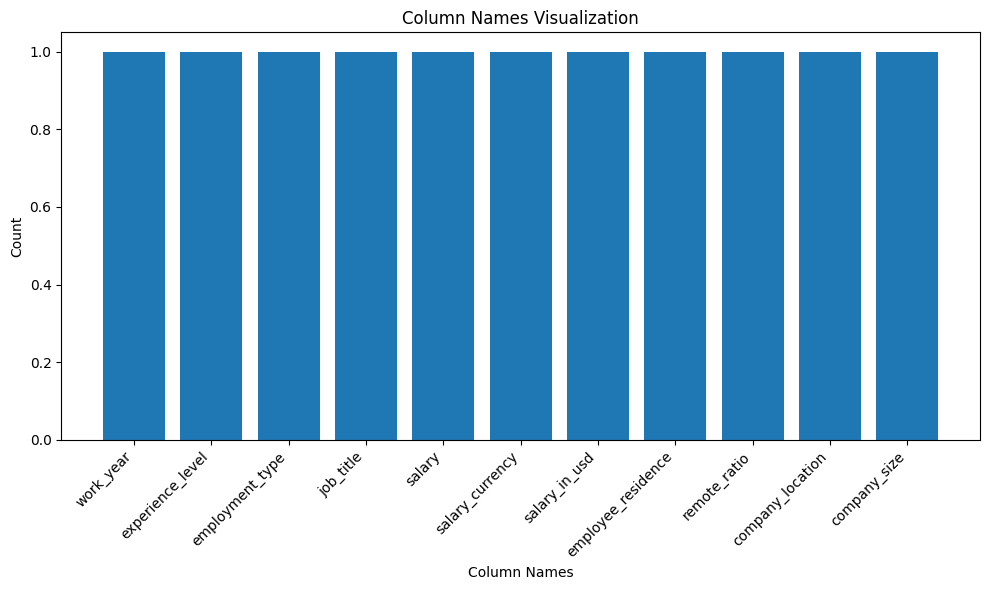

In [25]:
column_names = [
    'work_year', 'experience_level', 'employment_type', 'job_title',
    'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
    'remote_ratio', 'company_location', 'company_size'
]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(range(len(column_names)), [1] * len(column_names), tick_label=column_names)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Column Names')
plt.ylabel('Count')
plt.title('Column Names Visualization')
plt.tight_layout()
plt.show()

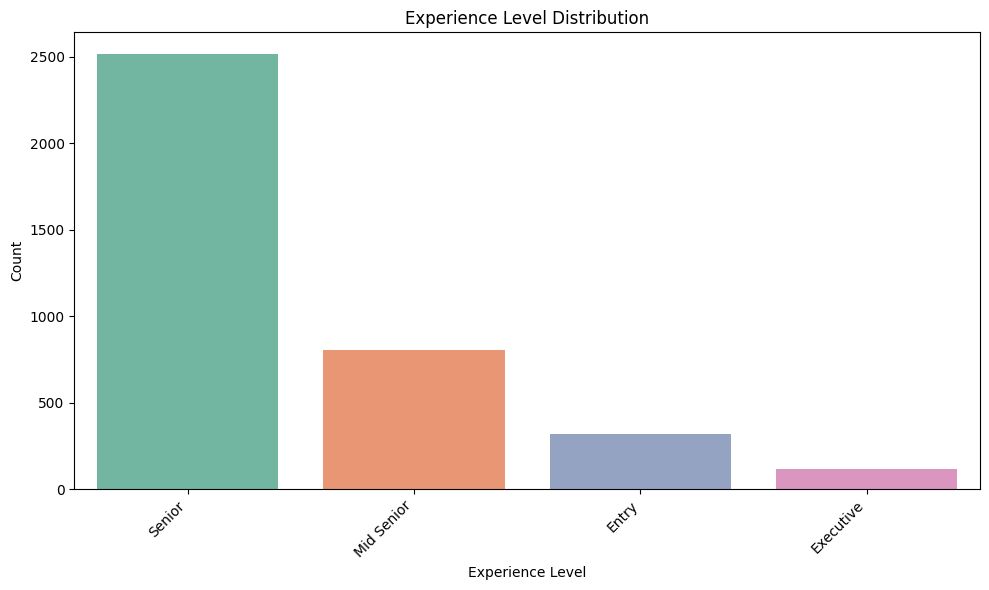

In [26]:
color_palette = sns.color_palette('Set2', n_colors=len(df['experience_level'].unique()))
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='experience_level', palette=color_palette)
plt.xlabel('Experience Level')
plt.ylabel('Count')
plt.title('Experience Level Distribution')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

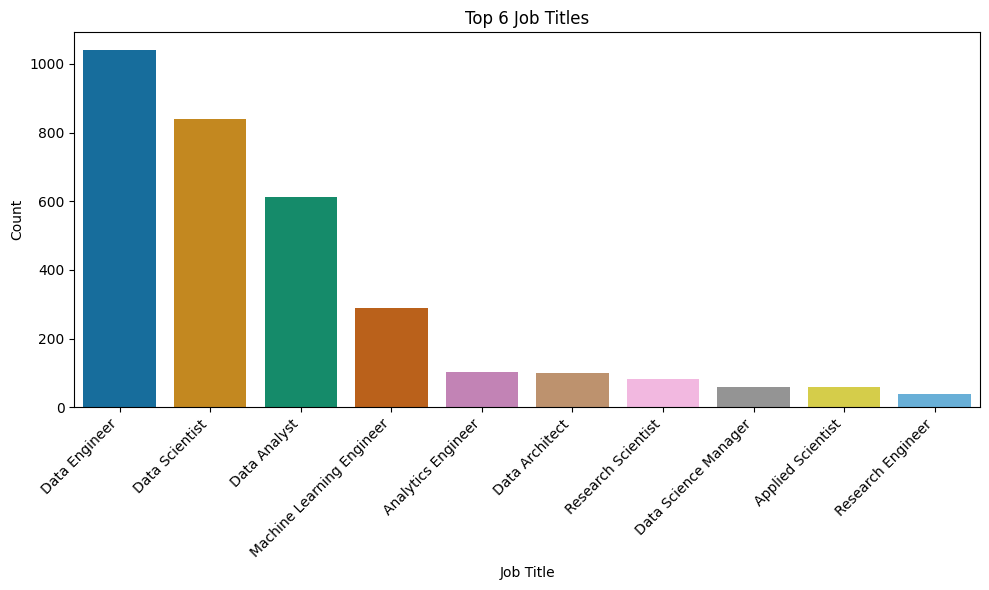

In [27]:

job_title_counts = df['job_title'].value_counts().sort_values(ascending=False)

top_6_job_titles = job_title_counts.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_6_job_titles.index, y=top_6_job_titles.values, palette='colorblind')
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.title('Top 6 Job Titles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Distribution of Salary')

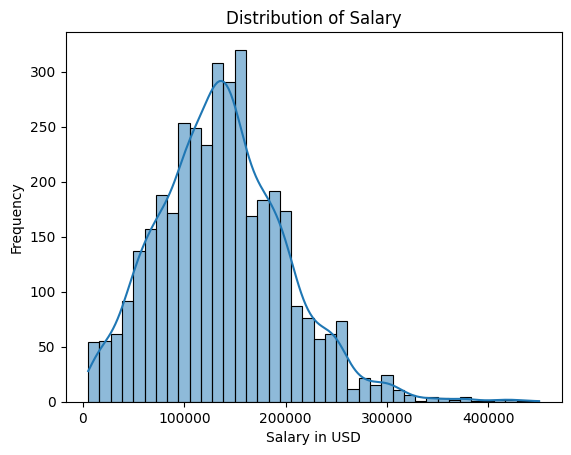

In [28]:
data = df['salary_in_usd']
sns.histplot(data, kde=True, bins=40)
plt.xlabel('Salary in USD')
plt.ylabel('Frequency')
plt.title('Distribution of Salary')

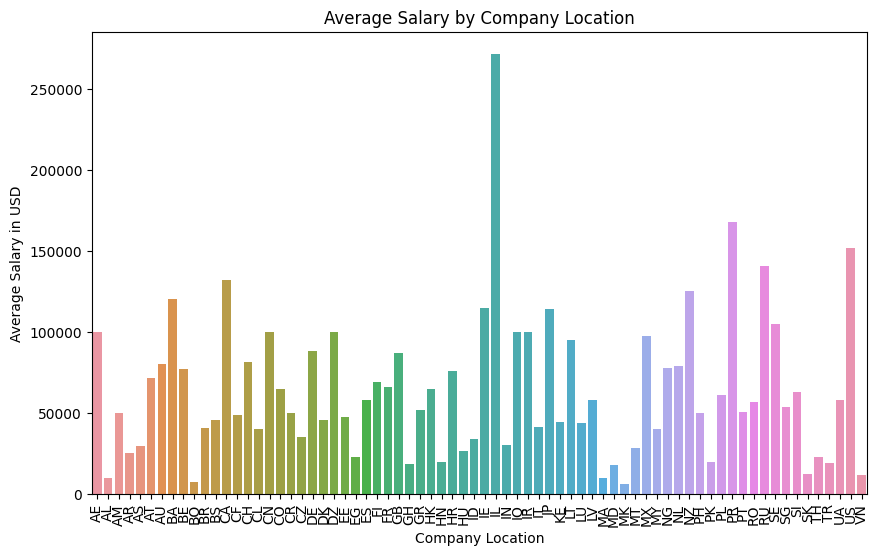

In [29]:
avg_salary_by_location = df.groupby('company_location')['salary_in_usd'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='company_location', y='salary_in_usd', data=avg_salary_by_location)
plt.xlabel('Company Location')
plt.ylabel('Average Salary in USD')
plt.title('Average Salary by Company Location')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

In [30]:
highest_salary = df['salary_in_usd'].max()

print("The highest salary paid is:", highest_salary)

The highest salary paid is: 450000


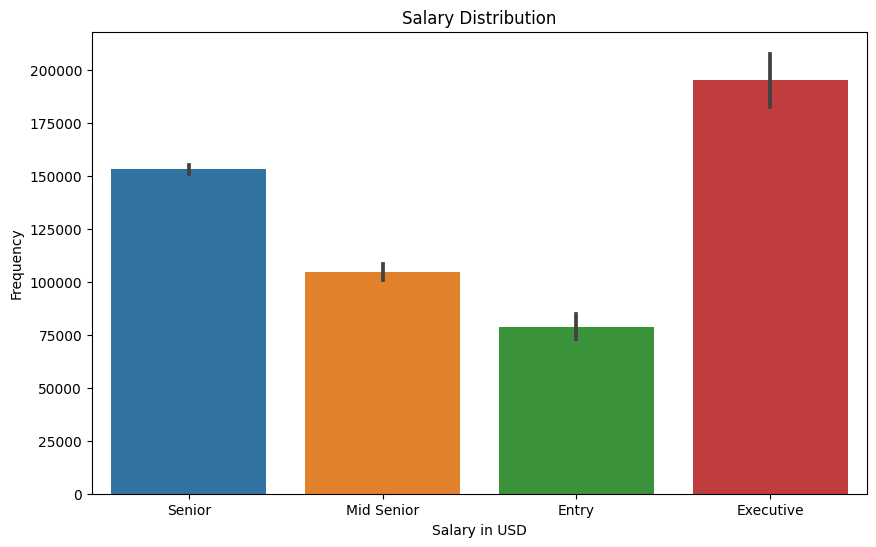

In [31]:
plt.figure(figsize=(10, 6))
sns.barplot(x='experience_level', y='salary_in_usd', data=df)
plt.title('Salary Distribution')
plt.xlabel('Salary in USD')
plt.ylabel('Frequency')
plt.show()



<ipython-input-32-a8264c2fe2c2>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='work_year', y='salary', data=df, ci=None, estimator='mean')


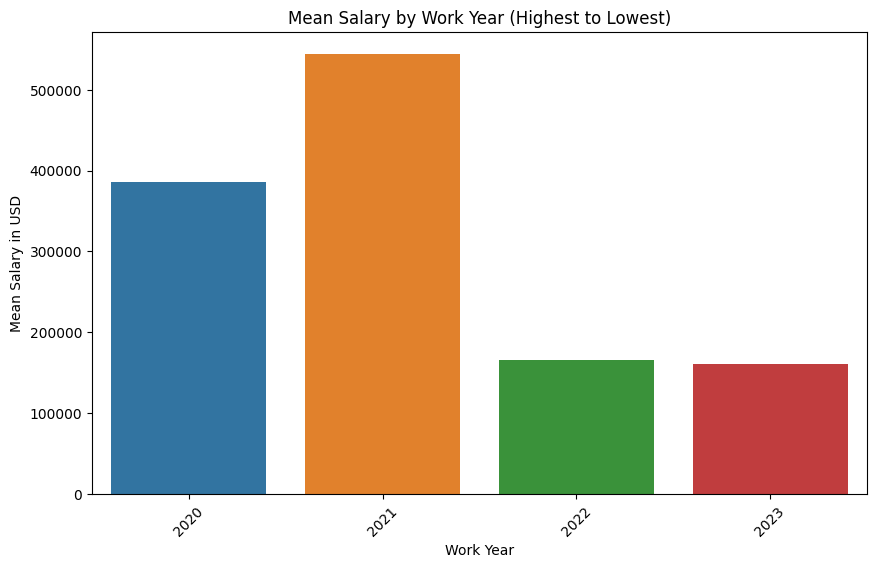

In [32]:
plt.figure(figsize=(10, 6))
sns.barplot(x='work_year', y='salary', data=df, ci=None, estimator='mean')
plt.xticks(rotation=45)
plt.title('Mean Salary by Work Year (Highest to Lowest)')
plt.xlabel('Work Year')
plt.ylabel('Mean Salary in USD')
plt.show()

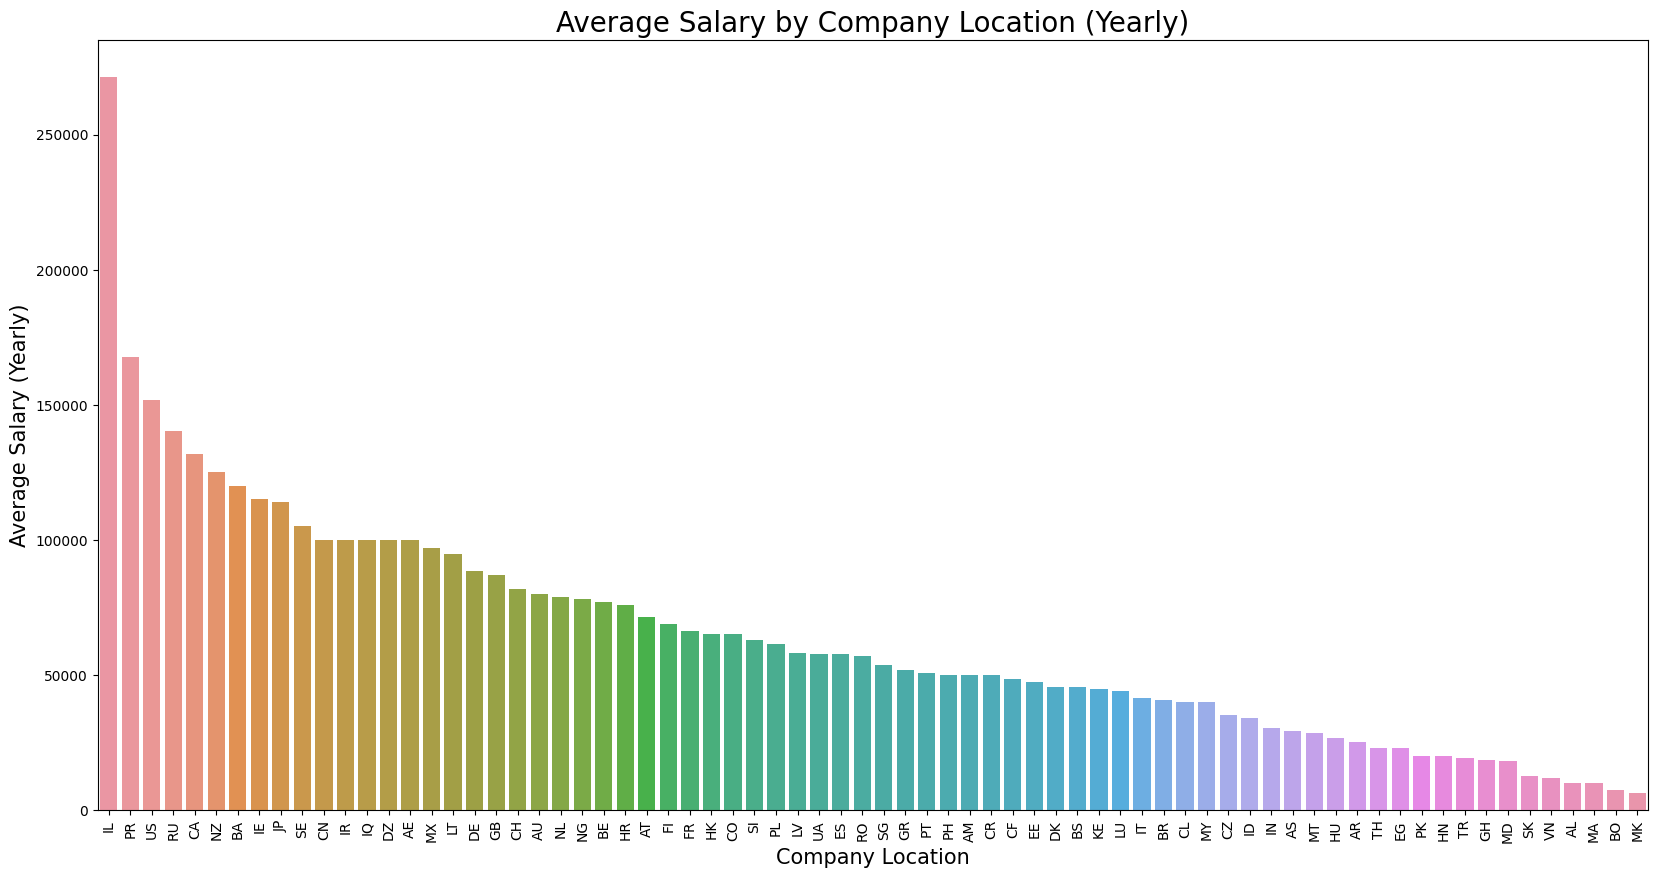

In [33]:
avg_salary_by_location = df.groupby('company_location')['salary_in_usd'].mean().sort_values(ascending=False)
plt.figure(figsize=(20, 10))
sns.barplot(x=avg_salary_by_location.index, y=avg_salary_by_location)
plt.title('Average Salary by Company Location (Yearly)',fontsize=20)
plt.xlabel('Company Location',fontsize=15)
plt.ylabel('Average Salary (Yearly)',fontsize=15)
plt.xticks(rotation=90)
plt.show()

<ipython-input-34-f088dec2f344>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='employment_type', y='salary', data=df, ci=None, estimator='mean')


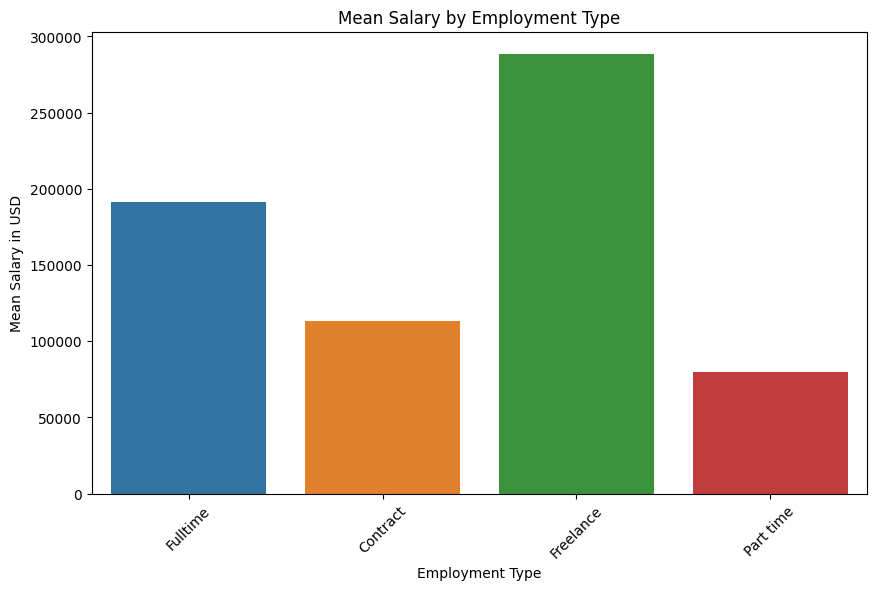

In [34]:
ddf_grouped = df.groupby(['employment_type'])['salary'].mean().reset_index()

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='employment_type', y='salary', data=df, ci=None, estimator='mean')
plt.xticks(rotation=45)
plt.title('Mean Salary by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Mean Salary in USD')
plt.show()

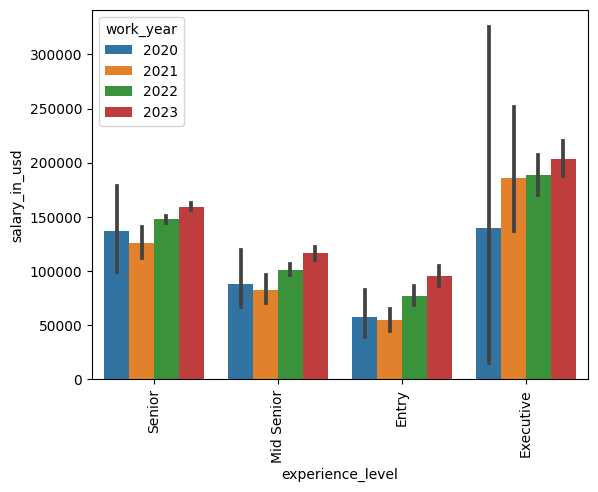

In [35]:
sns.barplot(x='experience_level',y='salary_in_usd',data=df,hue='work_year')
plt.xticks(rotation=90)
plt.show()

PREDICTIONS


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [37]:
X = df[['experience_level', 'employment_type', 'job_title', 'company_size']]
Y = df['salary_in_usd']
X = pd.get_dummies(X, drop_first=True)

In [38]:
X.head()

,experience_level_Executive,experience_level_Mid Senior,experience_level_Senior,employment_type_Freelance,employment_type_Fulltime,employment_type_Part time,job_title_AI Developer,job_title_AI Programmer,job_title_AI Scientist,job_title_Analytics Engineer,...,job_title_Principal Machine Learning Engineer,job_title_Product Data Analyst,job_title_Product Data Scientist,job_title_Research Engineer,job_title_Research Scientist,job_title_Software Data Engineer,job_title_Staff Data Analyst,job_title_Staff Data Scientist,company_size_M,company_size_S
0,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [39]:
Y.head()

0     85847
1     30000
2     25500
3    175000
4    120000
Name: salary_in_usd, dtype: int64

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [41]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
model = RandomForestRegressor(random_state=42)


In [42]:
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(max_depth=10, random_state=42)

In [43]:
y_pred = rf_model.predict(X_test)

In [44]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [45]:
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 3086716515.1023474
R-squared: 0.2181152888657294


NEURAL NETWORK

In [46]:
import tensorflow as tf

In [47]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [48]:
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['mae'])

In [49]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1)

Epoch 1/100
85/85 [==============================] - 3s 11ms/step - loss: 23106150400.0000 - mae: 138262.5938 - val_loss: 22416760832.0000 - val_mae: 136095.4062
Epoch 2/100
85/85 [==============================] - 1s 7ms/step - loss: 23071989760.0000 - mae: 138140.2969 - val_loss: 22341025792.0000 - val_mae: 135821.1250
Epoch 3/100
85/85 [==============================] - 0s 4ms/step - loss: 22918152192.0000 - mae: 137585.5781 - val_loss: 22091167744.0000 - val_mae: 134913.4688
Epoch 4/100
85/85 [==============================] - 0s 6ms/step - loss: 22536318976.0000 - mae: 136214.2344 - val_loss: 21572745216.0000 - val_mae: 133011.1562
Epoch 5/100
85/85 [==============================] - 1s 7ms/step - loss: 21844533248.0000 - mae: 133682.6875 - val_loss: 20716548096.0000 - val_mae: 129809.3828
Epoch 6/100
85/85 [==============================] - 0s 5ms/step - loss: 20791154688.0000 - mae: 129725.7891 - val_loss: 19487723520.0000 - val_mae: 125088.9688
Epoch 7/100
85/85 [==============

In [50]:

losses = pd.DataFrame(model.history.history)

<Axes: >

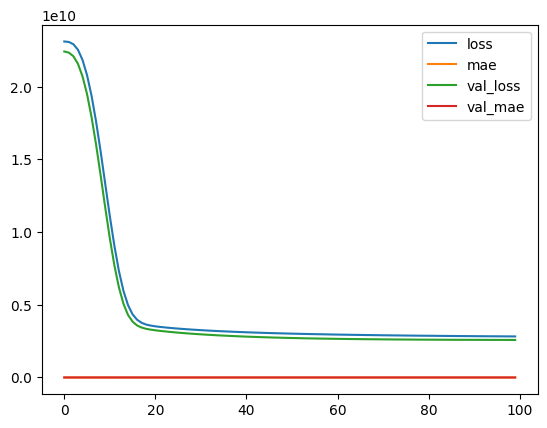

In [51]:
losses.plot()